Задача 2. 55 баллов Работаем с датасетом https://disk.yandex.ru/d/P6u1Za-nnmtwPA Скачайте его.

In [59]:
import pandas as pd
import numpy as np
import os, sys, json
import urllib.parse as ul

def get_CSV_FromYandex(url):
    base_url = 'https://cloud-api.yandex.net:443/v1/disk/public/resources/download?public_key='
    folder = '.'
    res = os.popen('wget -qO - {}{}'.format(base_url, url)).read()
    json_res = json.loads(res)
    filename = ul.parse_qs(ul.urlparse(json_res['href']).query)['filename'][0]
    os.system("wget '{}' -P '{}' -O '{}'".format(json_res['href'], folder, filename))
    return filename


df = pd.read_csv(get_CSV_FromYandex('https://disk.yandex.ru/d/P6u1Za-nnmtwPA'), index_col=0)

Оцениваем факторы, которые влияют на цену на аренду в Москве. Описание столбцов: metro - ближайшая станция метро price - цена за аренды minutes - расстояние до метро в минутах way - пусть до метро (пешком или на транспорте) views - просмотры квартиры provider - кто сдает квартиру (собственник, риелтор, застройщик) fee_percent - процент, который получает риелтор storey- этаж storeys- число этажей в здании living_area - жилая площаль kitchen_area - площадь кухни total_area - общая площадь

Часть 1. EDA. 30 баллов

Отобразите первые 5 и последние 5 строк. (1)

In [38]:
df

,metro,price,way,views,provider,fee_percent,storey,minutes,storeys,living_area,kitchen_area,total_area
0,Planernaia,45000,walk,513,realtor,50,7,10,12,19,8,38
1,VDNKh,50000,walk,389,realtor,50,16,10,16,18,8,41
2,Alekseevskaia,50000,walk,483,realtor,50,5,3,12,19,5,33
3,Sviblovo,38000,walk,414,realtor,50,3,15,5,37,37,37
4,Rimskaia,55999,walk,360,realtor,99,6,7,17,21,10,40
...,...,...,...,...,...,...,...,...,...,...,...,...
1441,Solntcevo,25000,walk,189,realtor,0,6,5,23,20,10,36
1442,Ulitca Starokachalovskaia,25000,walk,173,realtor,0,5,5,17,20,10,38
1443,Zhulebino,25000,walk,102,realtor,0,5,5,12,20,10,35
1444,Preobrazhenskaia ploshchad,40000,walk,60,realtor,30,3,17,9,20,8,35


Посчитайте описательные статистики числовых переменных с помощью describe() (1)

In [39]:
df.describe(include = 'number')

,price,views,fee_percent,storey,minutes,storeys,living_area,kitchen_area,total_area
count,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000
mean,43770.738589,417.917012,37.949516,7.089903,8.753804,22.545643,20.585754,11.369986,37.265560
std,33232.151532,936.532913,26.893347,16.511552,4.710759,347.279854,5.608993,8.083777,6.143386
min,14000.000000,4.000000,0.000000,1.000000,0.000000,1.000000,6.000000,3.000000,1.000000
25%,29000.000000,38.000000,0.000000,4.000000,5.000000,9.000000,18.000000,7.000000,34.000000
50%,38000.000000,103.000000,50.000000,6.000000,7.000000,12.000000,20.000000,10.000000,37.000000
75%,45000.000000,414.000000,50.000000,9.000000,12.000000,16.000000,21.000000,10.000000,40.000000
max,500000.000000,5174.000000,100.000000,613.000000,47.000000,13217.000000,37.000000,37.000000,57.000000


Посчитайте статистики по категориальным переменным. Сколько уникальных значений у переменной metro? (1)

In [40]:
df.describe(include = 'object')

,metro,way,provider
count,1446,1446,1446
unique,119,2,7
top,Planernaia,walk,realtor
freq,126,1331,615


Есть ли в датасете пропуски? (1)

In [41]:
df.isna().sum().sum() > 0

False

Есть ли в датасете полные дубликаты? (2)

In [42]:
df.duplicated().sum() > 0

True

In [60]:
df = df.drop_duplicates(keep='last')

In [61]:
df.duplicated().sum() > 0

False

Сколько уникальных значений у переменной provider? Есть ли со значениями этой переменной какие-нибудь проблемы? Если да, то как их исправить? (3)
Ответ текстом

In [62]:
#df['provider'] = df['provider'].apply(lambda x: x.strip())
len(df['provider'].unique()), df['provider'].unique()

(7,
 array(['owner                 ', 'realtor                 ',
        'agency                \xa0 \xa0\xa0 \xa0 ',
        'agency                \xa0 \xa0 ', 'agency                 ',
        'Застройщик                 ', 'realtor                \xa0 \xa0 '],
       dtype=object))

У переменной provider 7 уникальных значений, каждое из которых с пробельными символами. После применения метода strip() ко всем значениям переменной provider останется 4 уникальных значения.

In [63]:
df['provider'] = df['provider'].apply(lambda x: x.strip())
len(df['provider'].unique()), df['provider'].unique()

(4, array(['owner', 'realtor', 'agency', 'Застройщик'], dtype=object))

Постройте гистограммы распределения всех числовых переменных. Не забудьте подписать график и оси. (2)

  0%|          | 0/9 [00:00<?, ?it/s]

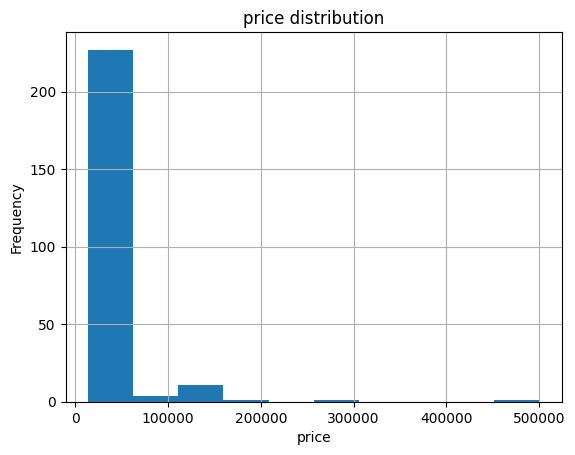

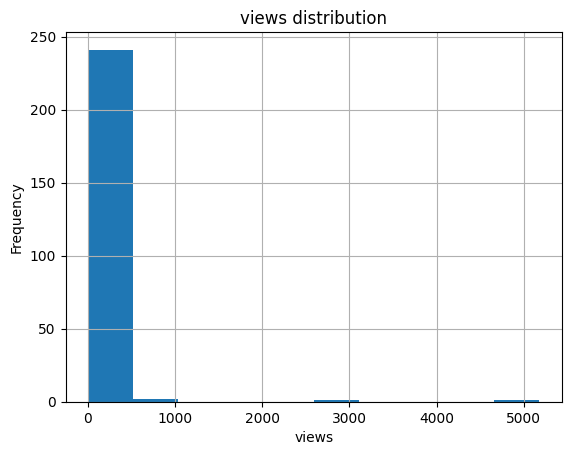

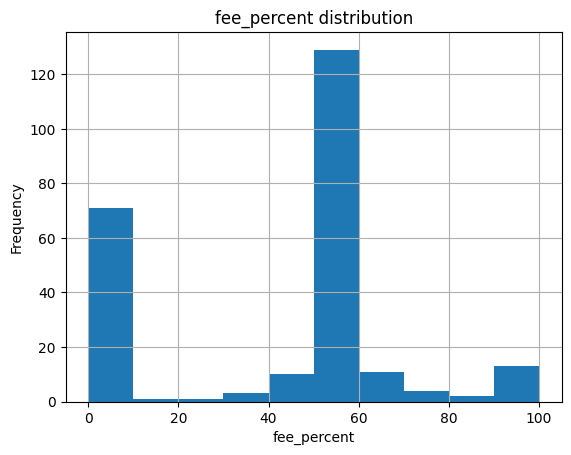

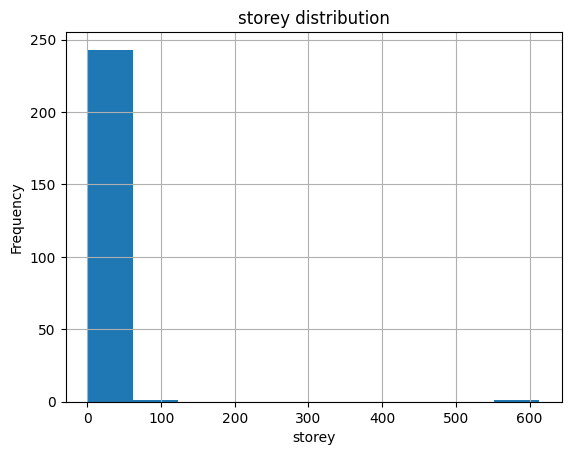

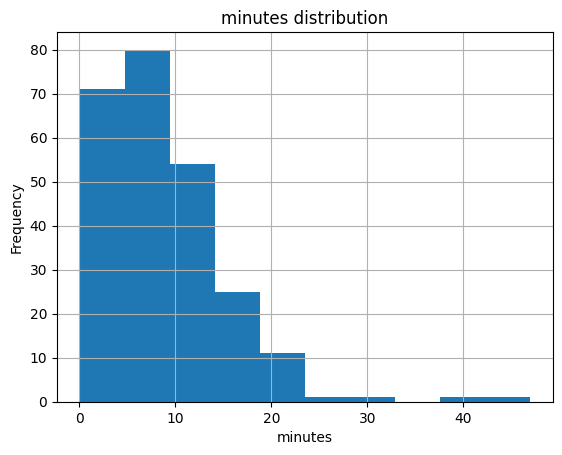

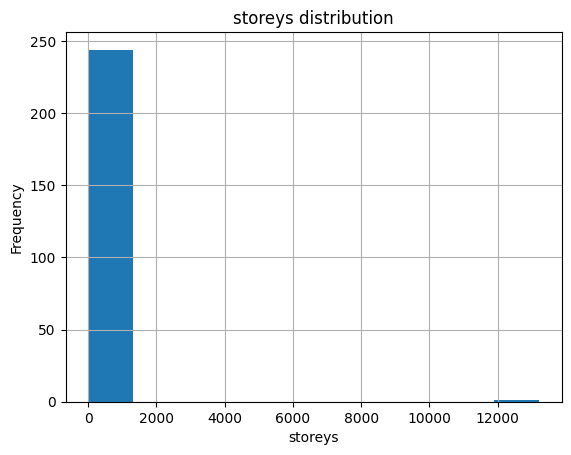

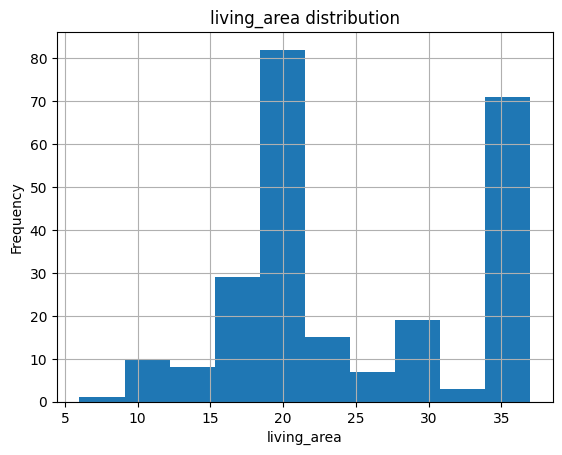

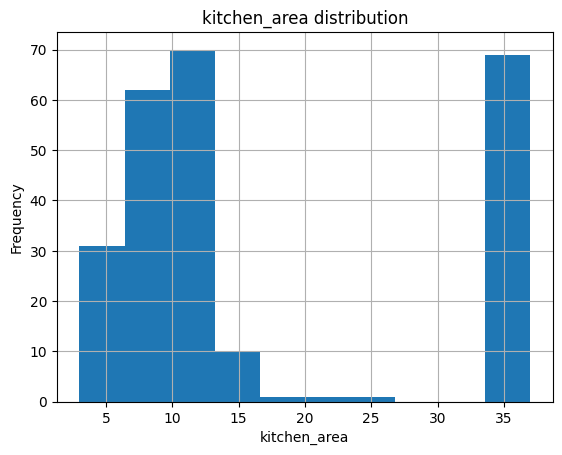

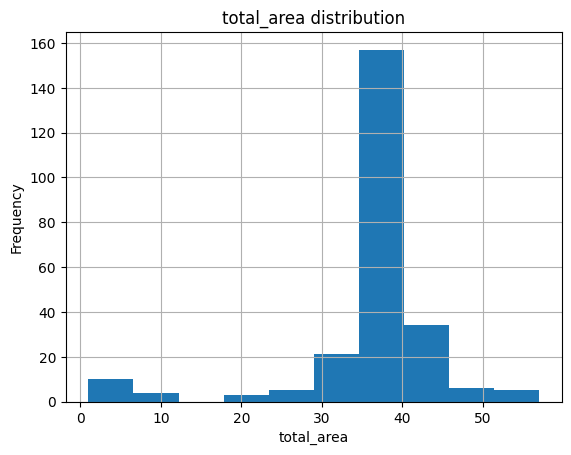

In [84]:
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

numeric_cols = df.select_dtypes([int, float]).columns
for col in tqdm(numeric_cols):
    ax = df[col].hist()
    ax.set_title(f'{col} distribution')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    plt.show()

Напишите функцию, которая принимает на вход датасет, названия столбцов, название графика и осей и рисует scatter plot. Нариcуйте с её помощью не менее трёх scatterplot. (4)

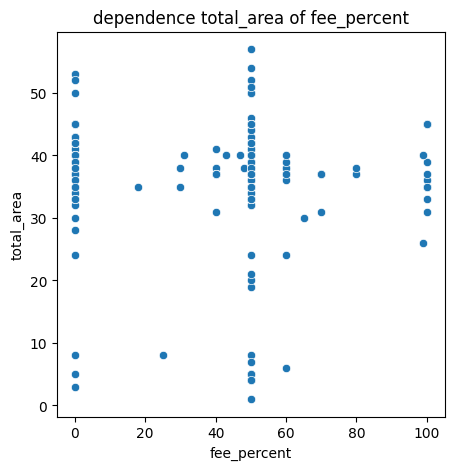

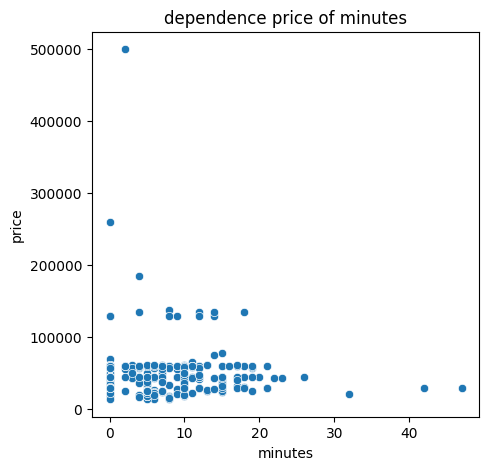

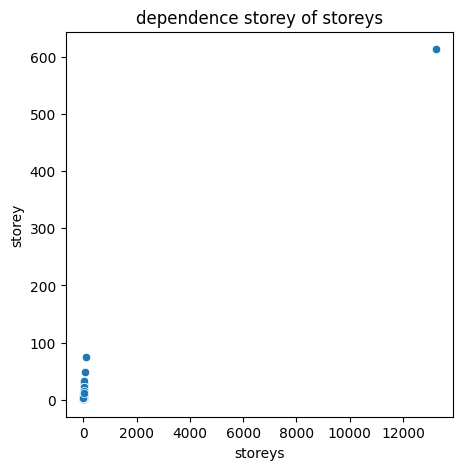

In [96]:
import seaborn as sns

def show_scatter_plot(df, cols, fig_title='scatter_plot', axes_names=['x', 'y']):
    fig = plt.figure(figsize=(5, 5))
    plt.title(fig_title)
    plt.xlabel(axes_names[0])
    plt.ylabel(axes_names[1])
    sns.scatterplot(df, x=cols[0], y=cols[1])
    plt.show()

show_scatter_plot(df, ['fee_percent', 'total_area'], 'dependence total_area of fee_percent', ['fee_percent', 'total_area'])
show_scatter_plot(df, ['minutes', 'price'], 'dependence price of minutes', ['minutes', 'price'])
show_scatter_plot(df, ['storeys', 'storey'], 'dependence storey of storeys', ['storeys', 'storey'])

Нарисуйте scatterplot всех пар переменных с помощью sns.pairplot. (1)

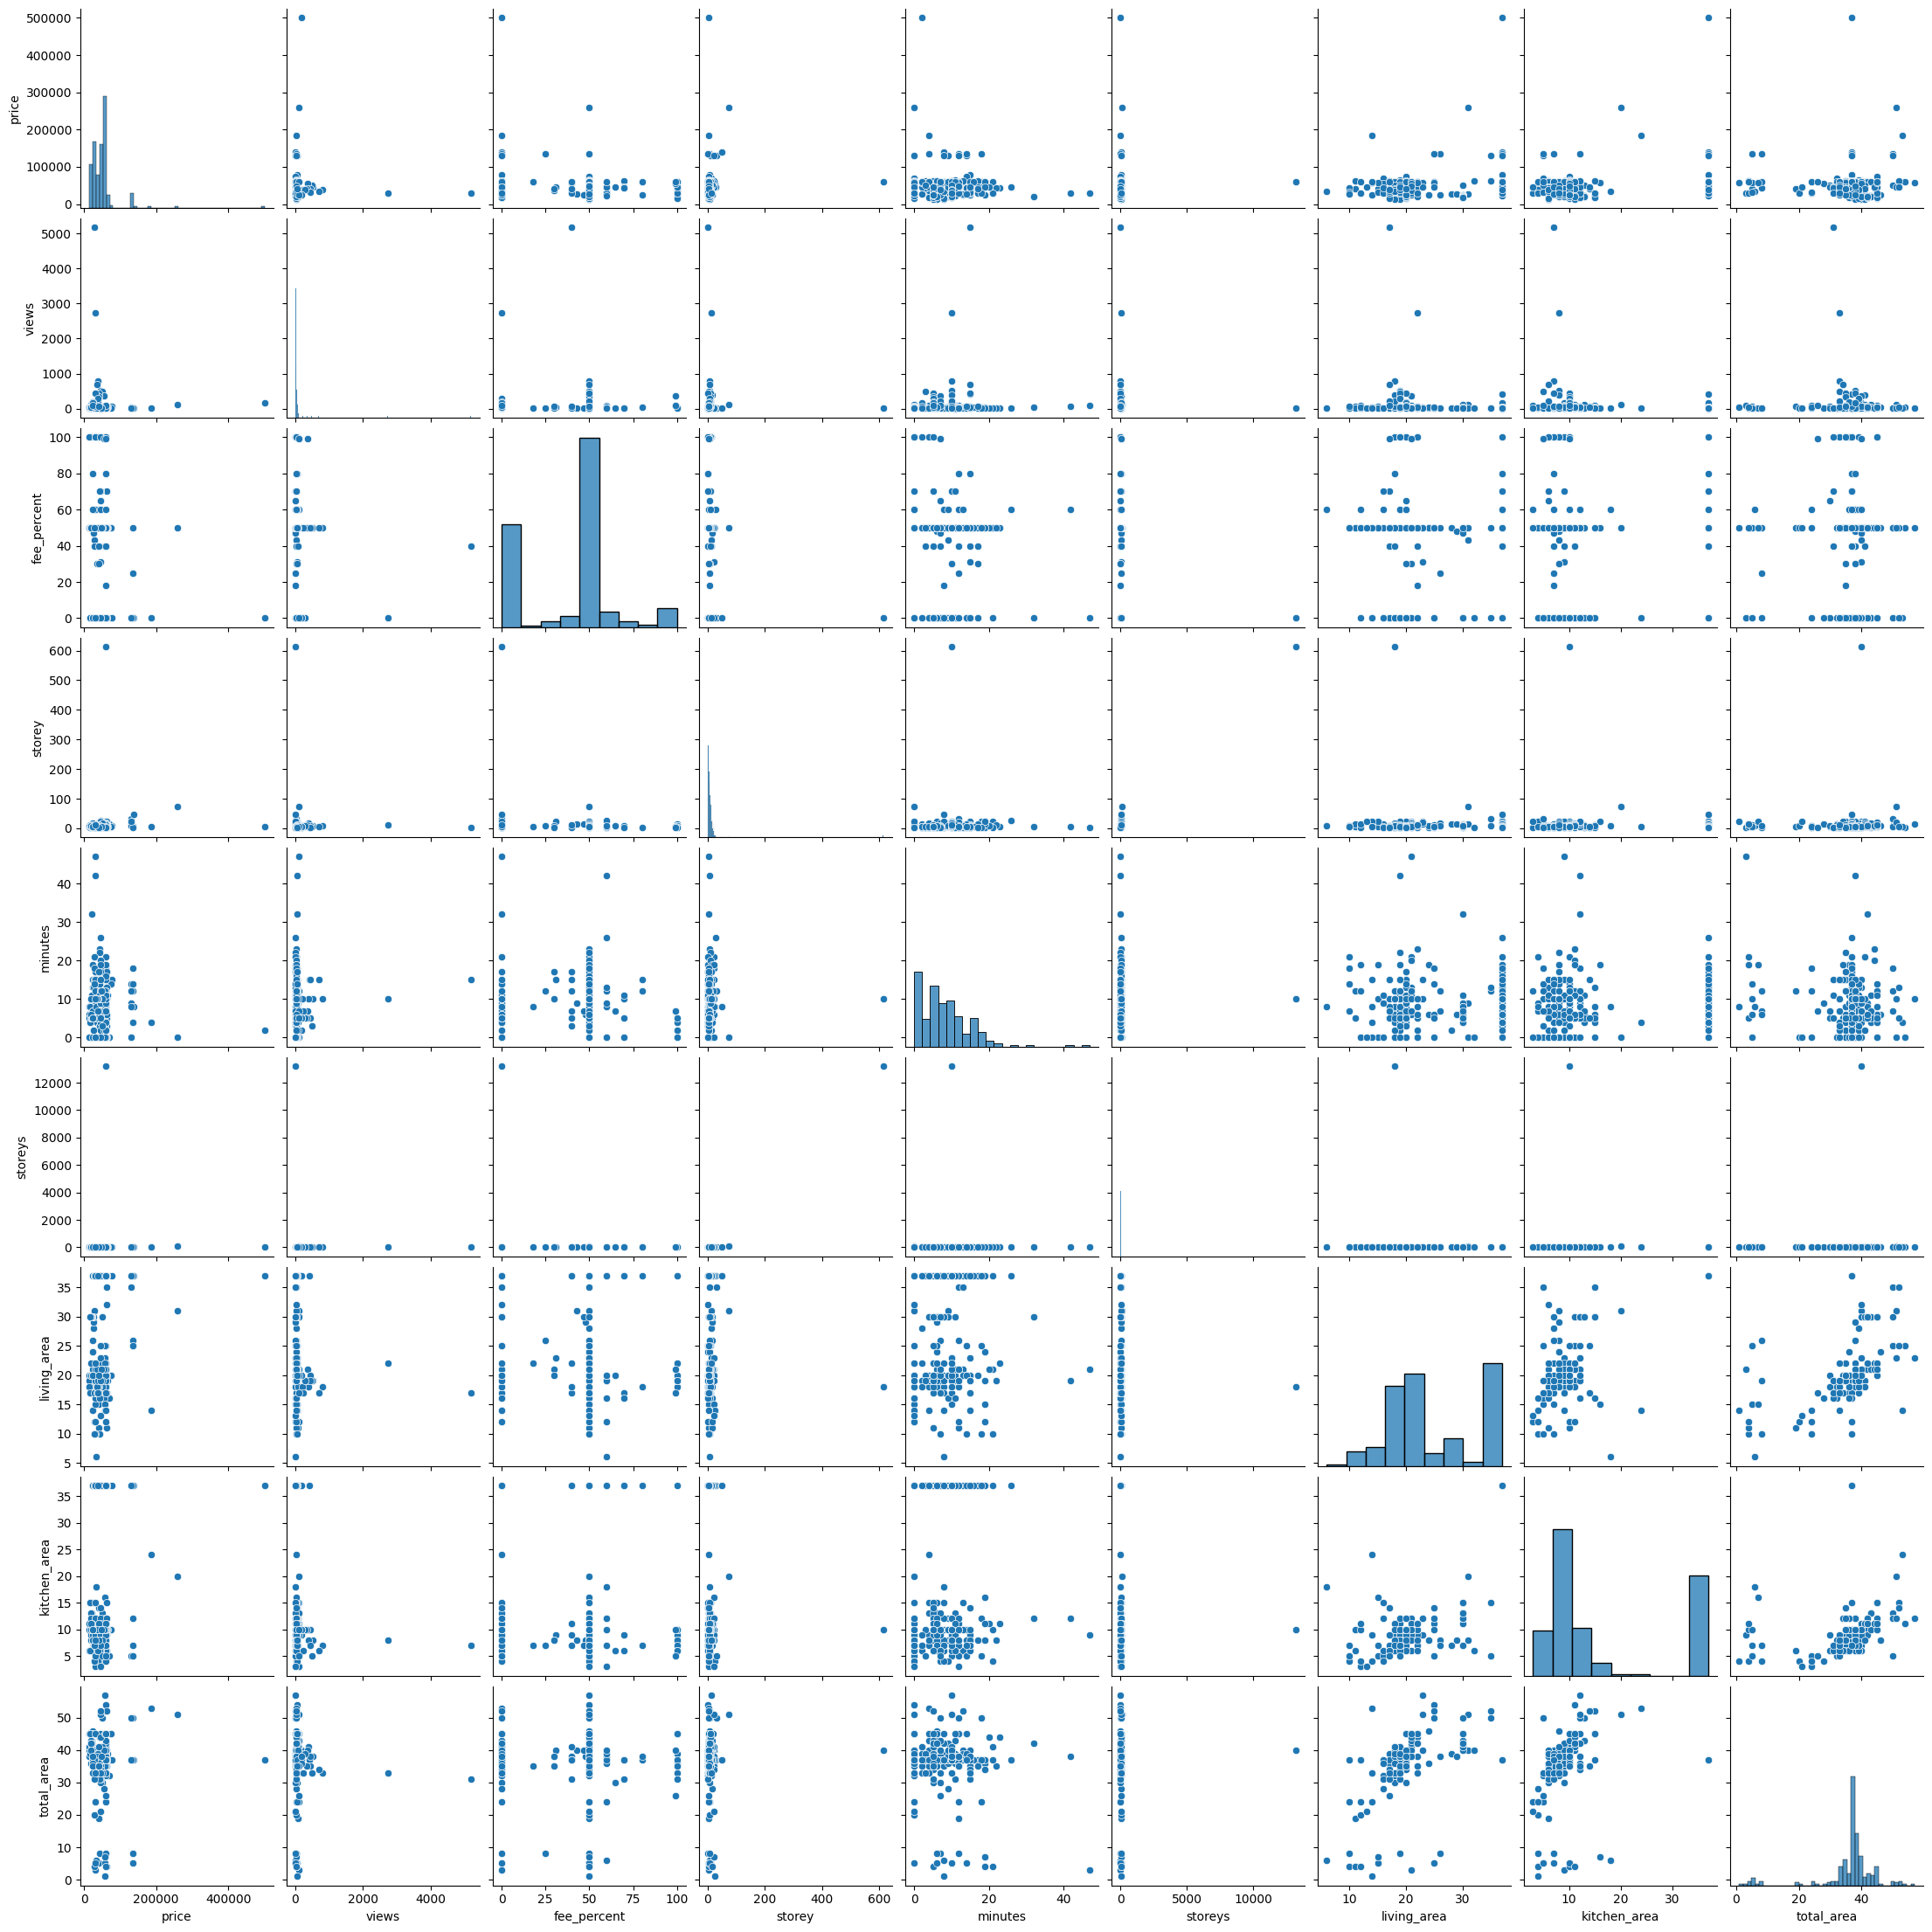

In [99]:
sns.pairplot(df, kind='scatter')

Нарисуйте boxplot переменной price. (2)

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff6503781f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff650378730>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff65030dc60>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff650378c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff650378f10>],
 'means': []}

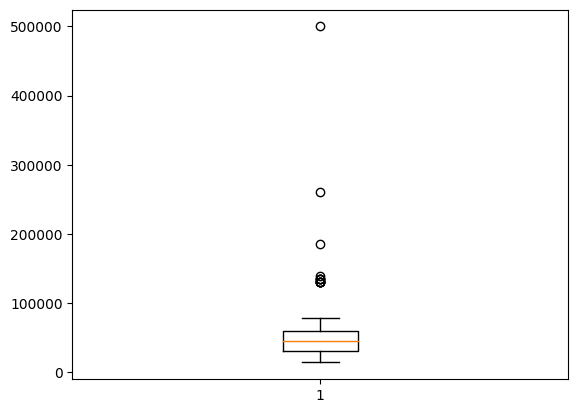

In [69]:
plt.boxplot(df['price'])

Нарисуйте еще какой-нибудь график, который считайте нужным. (2)

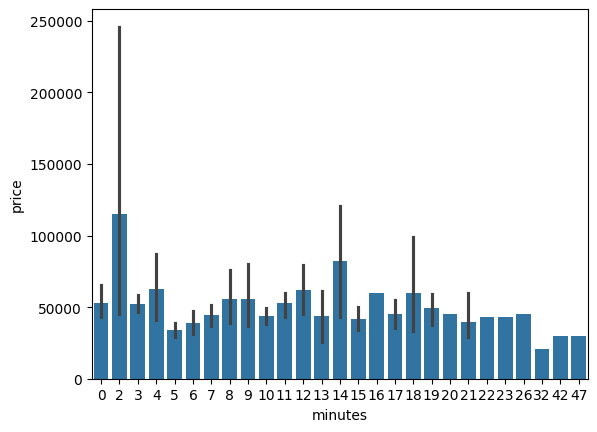

In [104]:
sns.barplot(df, x='minutes', y='price')
plt.show()

Какие выводы можно сделать из визуализаций 7-12? (2) Ответ текстом

В датасете очень много выбросов

Постройте таблицу корреляций и тепловую карту числовых переменных. Между какими переменными наблюдается линейная связь? (3) Ответ текстом

<Axes: >

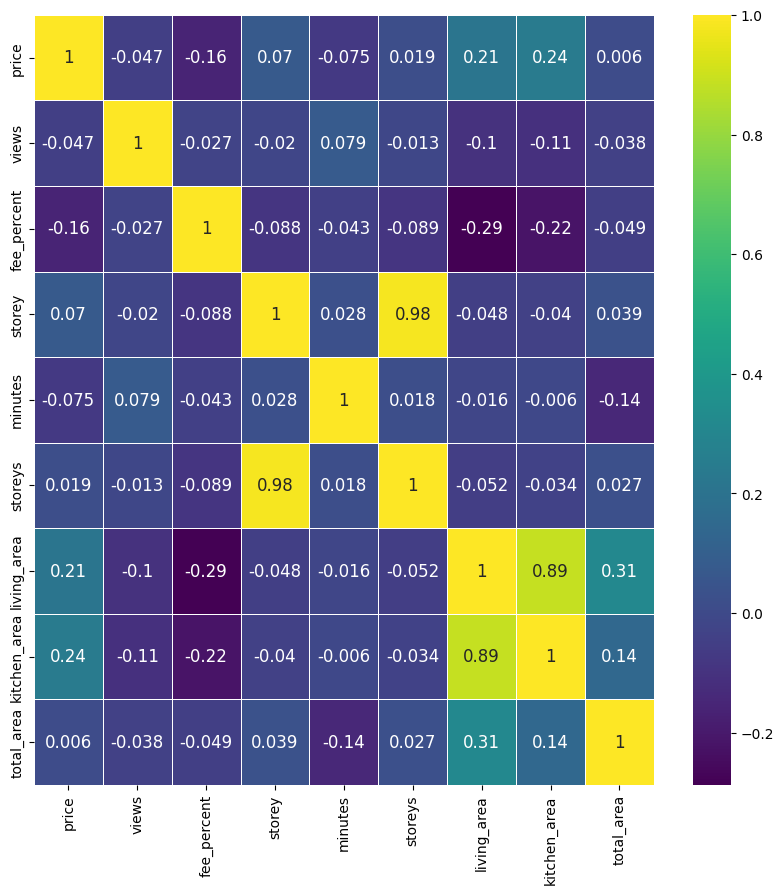

In [71]:
corr_table = df.corr(numeric_only=True)
corr_table

fig , ax = plt.subplots(figsize = (10,10))

sns.heatmap(corr_table,
            linewidths=0.5, annot=True,cmap='viridis',
            linecolor="white", annot_kws = {'size':12})

Линейная связь между storey & storeys, living_area & kitchen_area и наоборот. Небольшая обратная линейная зависимость есть между fee_percent и living_area

Часть 2. Построение модели. 30 баллов
Раздйлите датасет на обучающую и тестовую выборку. Постройте линейную регрессию для переменной price, используя только числовые переменные.
Перед этим стандартизируйте все независимые переменные с помощью StandardScaler. (5)

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE,  root_mean_squared_error as RMSE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df_1 = df.select_dtypes([int, float])
x = df_1.drop('price', axis=1)
y = df_1['price']

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, random_state=54)

lr = LinearRegression()
lr.fit(train_x, train_y)

pred_train = lr.predict(train_x)


38914.77978148469

Сделайте прогноз, посчитайте MSE и RMSE модели на тестовой выборке (5)

In [111]:
MSE(train_y, pred_train), RMSE(train_y, pred_train)

(1514360085.4414496, 38914.77978148469)

Закодируйте переменные way и provider с помощью OneHotEncoding и добавьте их в модель. Обучите модель еще раз, посчитайте MSE и RMSE (5)

Удалите из обучающей выборке выбросы по цене (тестовую выборку не трогайте!) Выбросами считайте цены, которые дороже, чем Q3+1.5∗IQR,
где IQR - межквартильный размах, Q3 - 75 перцентиль. Обучите модель еще раз, посчитайте MSE и RMSE (5)

Попробуйте написать свою реализацию функций MSE и RMSE. Функции должна принимать на вход numpy-массив истинных значений и предсказаний и возвращать результат.
Примените функции к предсказаниям последней модели. Сравните результат с библиотечной реализацией. (6) Напоминаем, что
MSE=1n∑ni=1(yi−yi^)2, где yi - истинное значение на i-ом наблюдении, yi^ - предсказание модели на i-ом наблюдении.
Также рекомендуем ознакомиться с документацией: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

Попробуйте улучшить модель, добавив еще какое-нибудь преобразование (например, можете оставить только часть столбцов, добавить новые признаки, закодировать переменную metro и т.п.). Посчитайте метрики. Удалось ли улучшить модель? (4)
Примечание. Любой разумный технически верно проведенный эксперимент засчитывается, даже если метрику улучшить не удалось.